In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

In [5]:
# Load the csv file
csv_file = "../csv_data/data_thick.csv"
#csv_file = "../csv_data/data50iter95toler.csv"

# Create pandas variables
pretty_print = pd.read_csv(csv_file)
df = pretty_print


### DF will be used for computations
# Compute speedup
df['Speedup'] = (df['Exact algorithm time'] / df['Approximation algorithm time']).apply(lambda x: f"{x:.4f}")

# Get weight from name
df['Weight'] = df['Name'].str.extract(r'weight(\d+)').astype(int)

# Round up and add % symbol
df['Confidence interval'] = ((1 - (df['Tolerance'] / df['Weight'])) * 100).apply(lambda x: f"{x:.3f}%")

# Set the place where we will move the Weight column
cols = list(df.columns)
cols.remove('Weight')
insert_index = cols.index('Tolerance') + 1
cols.insert(insert_index, 'Weight')

df = df[cols]

### Pretty print will be used to display the generated values
# Compute Speedup
pretty_print['Speedup'] = (pretty_print['Exact algorithm time'] / pretty_print['Approximation algorithm time']).apply(lambda x: f"{x:.4f}")

# Prettify Approximate time
pretty_print['Approximation algorithm time'] = pretty_print['Approximation algorithm time'].apply(lambda x: f"{x:.3f}s").astype(str)
# Prettify Exact time
pretty_print['Exact algorithm time'] = pretty_print['Exact algorithm time'].apply(lambda x: f"{x:.3f}s").astype(str)

# Add a % symbol
pretty_print['Accuracy'] = pretty_print['Accuracy'].apply(lambda x: f"{x:.2f}%")

# Round up and add % symbol
pretty_print['Confidence interval'] = ((1 - (pretty_print['Tolerance'] / pretty_print['Weight'])) * 100).apply(lambda x: f"{x:.3f}%")

# Set the place where we will move the Weight column
cols = list(pretty_print.columns)
cols.remove('Weight')
insert_index = cols.index('Tolerance') + 1
cols.insert(insert_index, 'Weight')

pretty_print = pretty_print[cols]

pretty_print

,Name,Exact algorithm time,Approximation algorithm time,Accuracy,Tolerance,Weight,Iteration modifier,Speedup,Confidence interval
0,graph-nodes302-seed1000-prob0.7-weight100-tole...,66.496s,43.897s,97.51%,5.0,100,0.7,1.5148,95.000%
1,graph-nodes310-seed1001-prob0.7-weight100-tole...,67.456s,40.637s,94.03%,5.0,100,0.7,1.6600,95.000%
2,graph-nodes313-seed1004-prob0.7-weight100-tole...,72.200s,30.740s,88.73%,5.0,100,0.5,2.3488,95.000%
3,graph-nodes301-seed1005-prob0.7-weight100-tole...,63.806s,33.832s,87.38%,5.0,100,0.5,1.8860,95.000%
4,graph-nodes318-seed1006-prob0.7-weight100-tole...,74.439s,22.895s,56.55%,5.0,100,0.3,3.2514,95.000%
...,...,...,...,...,...,...,...,...,...
436,graph-nodes313-seed1000-prob0.7-weight100-tole...,73.666s,21.367s,65.12%,5.0,100,0.3,3.4477,95.000%
437,graph-nodes307-seed1001-prob0.7-weight100-tole...,67.813s,19.664s,58.20%,5.0,100,0.3,3.4485,95.000%
438,graph-nodes315-seed1000-prob0.7-weight100-tole...,74.519s,23.894s,50.21%,5.0,100,0.3,3.1187,95.000%
439,graph-nodes309-seed1006-prob0.7-weight100-tole...,69.451s,47.787s,94.62%,5.0,100,0.7,1.4533,95.000%


In [6]:
# Change type into float
df['Speedup'] = df['Speedup'].astype(float)

# Drop infinite values
#df = df[~df['Speedup'].isin([np.inf, -np.inf])]
#df = df.dropna()

# Cut off any bad values
#df = df[df['Speedup'] <= 20]

df

,Name,Exact algorithm time,Approximation algorithm time,Accuracy,Tolerance,Weight,Iteration modifier,Speedup,Confidence interval
0,graph-nodes302-seed1000-prob0.7-weight100-tole...,66.495542,43.897314,97.51,5.0,100,0.7,1.5148,95.000%
1,graph-nodes310-seed1001-prob0.7-weight100-tole...,67.456398,40.637358,94.03,5.0,100,0.7,1.6600,95.000%
2,graph-nodes313-seed1004-prob0.7-weight100-tole...,72.199737,30.739627,88.73,5.0,100,0.5,2.3488,95.000%
3,graph-nodes301-seed1005-prob0.7-weight100-tole...,63.806204,33.832165,87.38,5.0,100,0.5,1.8860,95.000%
4,graph-nodes318-seed1006-prob0.7-weight100-tole...,74.438865,22.894749,56.55,5.0,100,0.3,3.2514,95.000%
...,...,...,...,...,...,...,...,...,...
436,graph-nodes313-seed1000-prob0.7-weight100-tole...,73.665893,21.366914,65.12,5.0,100,0.3,3.4477,95.000%
437,graph-nodes307-seed1001-prob0.7-weight100-tole...,67.813092,19.664358,58.20,5.0,100,0.3,3.4485,95.000%
438,graph-nodes315-seed1000-prob0.7-weight100-tole...,74.518712,23.893843,50.21,5.0,100,0.3,3.1187,95.000%
439,graph-nodes309-seed1006-prob0.7-weight100-tole...,69.450572,47.786809,94.62,5.0,100,0.7,1.4533,95.000%


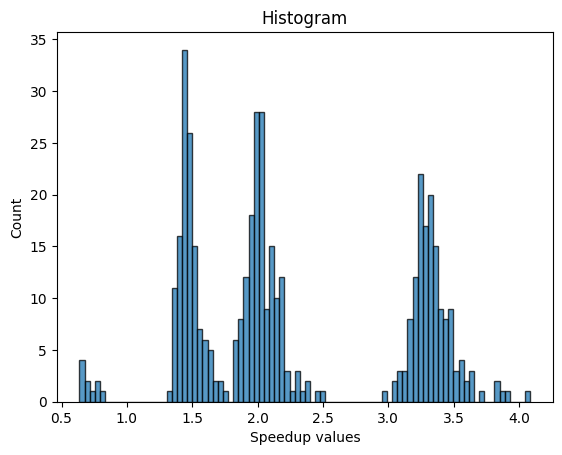

In [7]:
df['Speedup'] = pd.to_numeric(df['Speedup'], errors='coerce')

n_bins = (df.shape[0] // 10) * 2

df['Speedup'].plot.hist(bins=n_bins, alpha=0.75, edgecolor='black')

# Přidání popisků
plt.title("Histogram")
plt.xlabel("Speedup values")
plt.ylabel("Count")
#plt.grid(True, linestyle='--', alpha=0.6)

# Zobrazení grafu
plt.show()

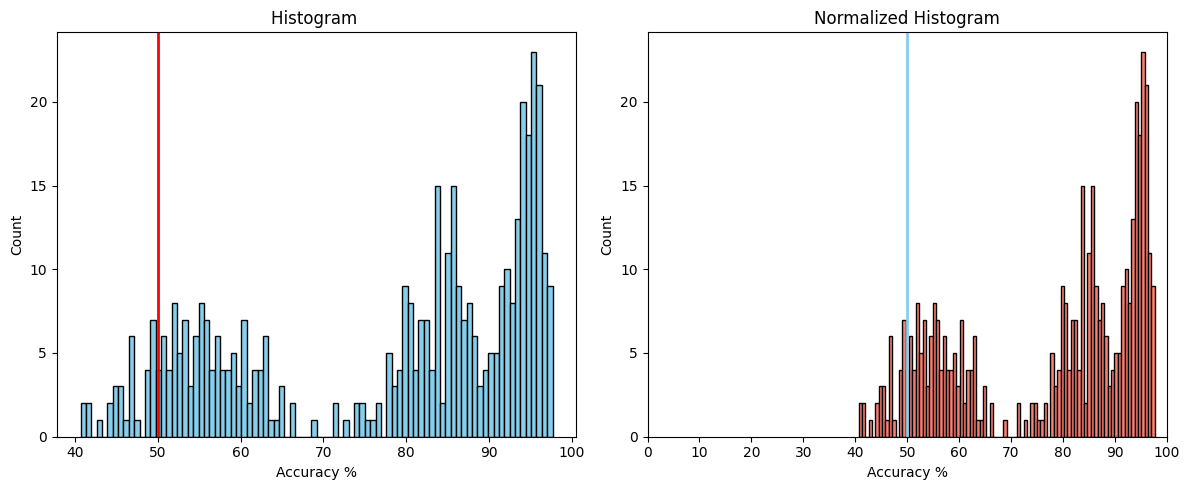

In [8]:
df['Accuracy'] = pd.to_numeric(df['Accuracy'], errors='coerce')

n_bins = (df.shape[0] // 10) * 2

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['Accuracy'].plot(kind='hist', bins=n_bins, ax=axes[0], color='skyblue', edgecolor="black")
axes[0].set_title('Histogram ')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Accuracy %')
axes[0].axvline(50, color='red', linestyle='-', linewidth=2, label='50%')
#axes[0].grid(True, linestyle='-', alpha=0.8)

df['Accuracy'].plot(kind='hist', bins=n_bins, ax=axes[1], color='salmon', edgecolor="black")
axes[1].set_title('Normalized Histogram')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Accuracy %')
axes[1].set_xlim(0, 100)
axes[1].axvline(50, color='skyblue', linestyle='-', linewidth=2, label='50%')
axes[1].set_xticks(np.arange(0, 101, 10))
#axes[1].grid(True, linestyle='--', alpha=0.8)





plt.tight_layout()
plt.show()

<>:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_12674/3397372633.py:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if(df1.shape[0] is not 0):
/tmp/ipykernel_12674/3397372633.py:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if(df1.shape[0] is not 0):
/tmp/ipykernel_12674/3397372633.py:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if(df1.shape[0] is not 0):


ValueError: `bins` must be positive, when an integer

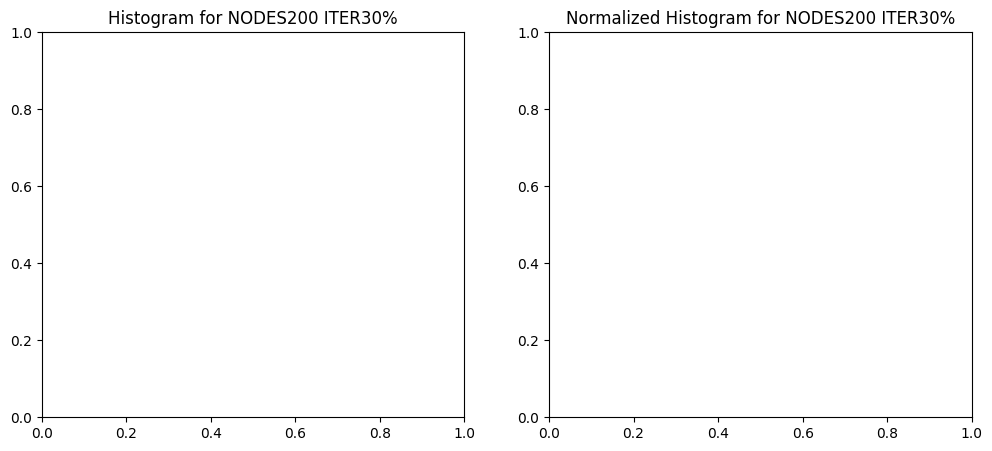

In [15]:


for i in range(6):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    if (i // 3) == 0:

        nodes_condition = df['Name'].str.contains(r'nodes2\d{2}')  # Nodes contain 2XX
        
        if (i % 3) == 0:
            iteration_condition = df['Iteration modifier'] == 0.3  # Iteration Modifier == 0.3
            line = 30
            axes[0].set_title('Histogram for NODES200 ITER30%')
            axes[1].set_title('Normalized Histogram for NODES200 ITER30%')
        elif (i % 3) == 1:
            iteration_condition = df['Iteration modifier'] == 0.5  # Iteration Modifier == 0.5
            line = 50
            axes[0].set_title('Histogram for NODES200 ITER50%')
            axes[1].set_title('Normalized Histogram for NODES200 ITER50%')
        else:
            iteration_condition = df['Iteration modifier'] == 0.7  # Iteration Modifier == 0.7
            line = 70
            axes[0].set_title('Histogram for NODES200 ITER70%')
            axes[1].set_title('Normalized Histogram for NODES200 ITER70%')

        # Get the data
        df1 = df[nodes_condition & iteration_condition]

    else:

        nodes_condition = df['Name'].str.contains(r'nodes3\d{2}')  # Nodes contain 3XX

        if (i % 3) == 0:
            iteration_condition = df['Iteration modifier'] == 0.3  # Iteration Modifier == 0.3
            line = 30
            axes[0].set_title('Histogram for NODES300 ITER30%')
            axes[1].set_title('Normalized Histogram for NODES300 ITER30%')
        elif (i % 3) == 1:
            iteration_condition = df['Iteration modifier'] == 0.5  # Iteration Modifier == 0.5
            line = 50
            axes[0].set_title('Histogram for NODES300 ITER50%')
            axes[1].set_title('Normalized Histogram for NODES300 TER50%')
        else:
            iteration_condition = df['Iteration modifier'] == 0.7  # Iteration Modifier == 0.7
            line = 70
            axes[0].set_title('Histogram for NODES300 ITER70%')
            axes[1].set_title('Normalized Histogram for NODES300 ITER70%')

        df1 = df[nodes_condition & iteration_condition]


    df1.loc[:, 'Accuracy'] = pd.to_numeric(df1['Accuracy'], errors='coerce')

    
    n_bins = (df1.shape[0] // 10) * 2
    if(n_bins is 0):
        n_bins = 1

    df1['Accuracy'].plot(kind='hist', bins=n_bins, ax=axes[0], color='skyblue', edgecolor="black")
    axes[0].set_ylabel('Count')
    axes[0].set_xlabel('Accuracy %')
    axes[0].axvline(line, color='red', linestyle='-', linewidth=2, label='50%')
    #axes[0].grid(True, linestyle='-', alpha=0.8)

    df1['Accuracy'].plot(kind='hist', bins=n_bins, ax=axes[1], color='salmon', edgecolor="black")

    axes[1].set_ylabel('Count')
    axes[1].set_xlabel('Accuracy %')
    axes[1].set_xlim(0, 100)
    axes[1].axvline(line, color='skyblue', linestyle='-', linewidth=2, label='50%')
    axes[1].set_xticks(np.arange(0, 101, 10))
    #axes[1].grid(True, linestyle='--', alpha=0.8)

    plt.tight_layout()
    plt.show()

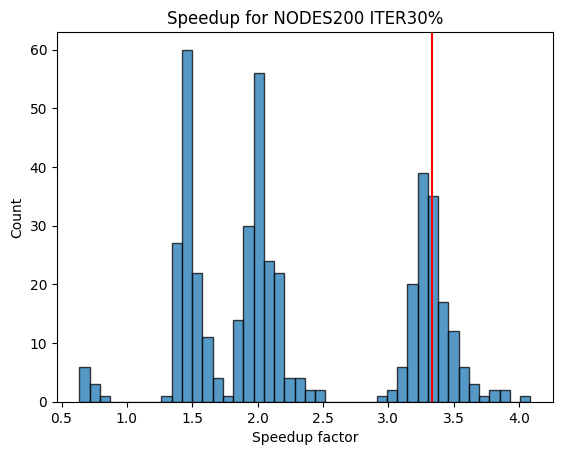

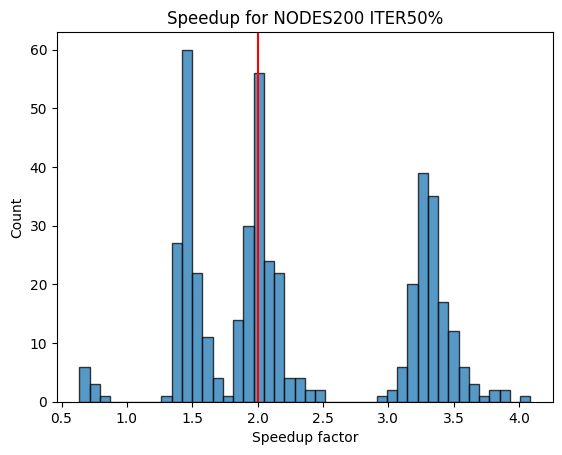

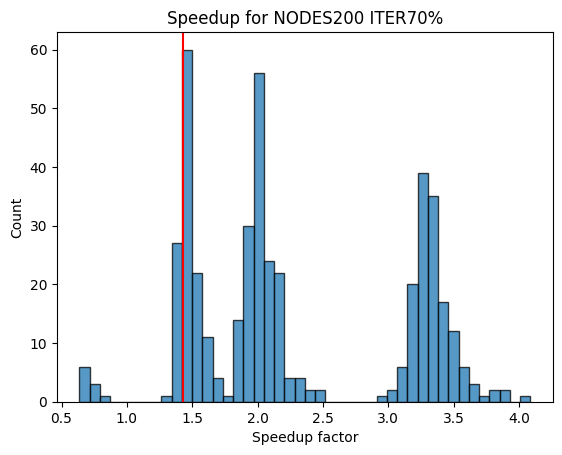

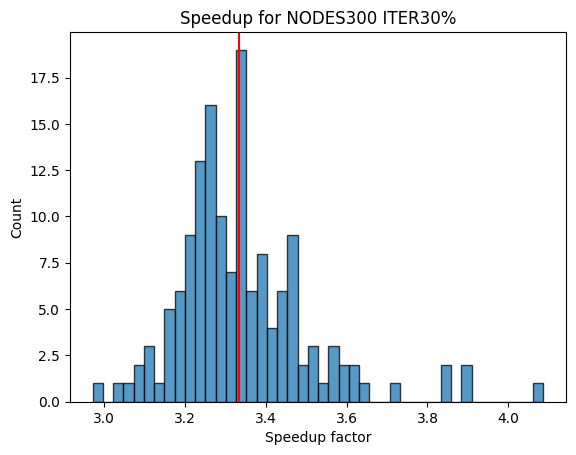

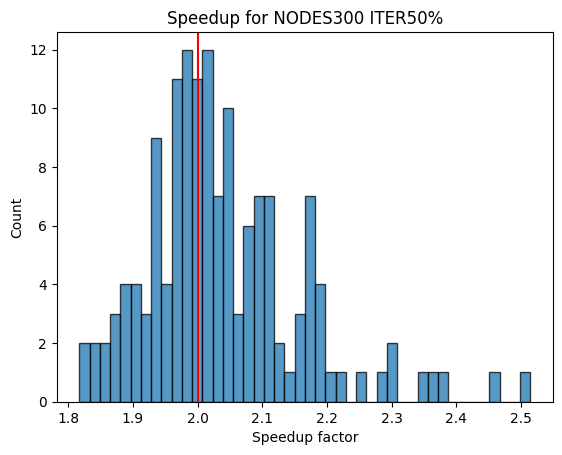

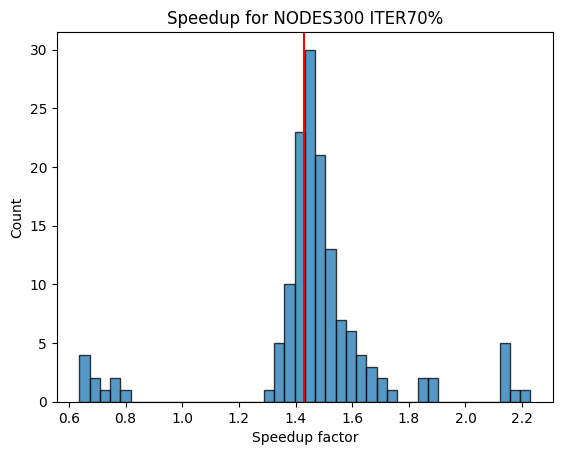

In [12]:
for i in range(6):
    #fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    if (i // 3) == 0:

        nodes_condition = df['Name'].str.contains(r'nodes2\d{2}')  # Nodes contain 2XX
        
        if (i % 3) == 0:
            iteration_condition = df['Iteration modifier'] == 0.3  # Iteration Modifier == 0.3
            line = 10/3
            plt.title('Speedup for NODES200 ITER30%')
        elif (i % 3) == 1:
            iteration_condition = df['Iteration modifier'] == 0.5  # Iteration Modifier == 0.5
            line = 2
            plt.title('Speedup for NODES200 ITER50%')
        else:
            iteration_condition = df['Iteration modifier'] == 0.7  # Iteration Modifier == 0.7
            line = 10/7
            plt.title('Speedup for NODES200 ITER70%')

        # Get the data
        df2 = df[nodes_condition & iteration_condition]

    else:

        nodes_condition = df['Name'].str.contains(r'nodes3\d{2}')  # Nodes contain 3XX

        if (i % 3) == 0:
            iteration_condition = df['Iteration modifier'] == 0.3  # Iteration Modifier == 0.3
            line = 10/3
            plt.title('Speedup for NODES300 ITER30%')
        elif (i % 3) == 1:
            iteration_condition = df['Iteration modifier'] == 0.5  # Iteration Modifier == 0.5
            line = 2
            plt.title('Speedup for NODES300 ITER50%')
        else:
            iteration_condition = df['Iteration modifier'] == 0.7  # Iteration Modifier == 0.7
            line = 10/7
            plt.title('Speedup for NODES300 ITER70%')

        df2 = df[nodes_condition & iteration_condition]


    df2.loc[:, 'Speedup'] = pd.to_numeric(df['Speedup'], errors='coerce')

    df['Speedup'] = pd.to_numeric(df['Speedup'], errors='coerce')
    
    n_bins = (df.shape[0] // 10) 
    
    df2['Speedup'].plot.hist(bins=n_bins, alpha=0.75, edgecolor='black')
    
    # Přidání popisků
    plt.xlabel("Speedup factor")
    plt.axvline(x=line, color='red', linestyle='-')
    plt.ylabel("Count")
    #plt.grid(True, linestyle='--', alpha=0.6)
    
    # Zobrazení grafu
    plt.show()

In [335]:
csv_file = "../csv_data/dataBIG.csv"

big = pd.read_csv(csv_file)

big


### Big will be used for computations
# Compute speedup
big['Speedup'] = (big['Exact algorithm time'] / big['Approximation algorithm time']).apply(lambda x: f"{x:.4f}")

big['Speedup'] = big['Speedup'].astype(float)

# Get weight from name
big['Weight'] = big['Name'].str.extract(r'weight(\d+)').astype(int)

# Round up and add % symbol
big['Confidence interval'] = ((1 - (big['Tolerance'] / big['Weight'])) * 100).apply(lambda x: f"{x:.3f}").astype(float)

# Set the place where we will move the Weight column
cols = list(big.columns)
cols.remove('Weight')
insert_index = cols.index('Tolerance') + 1
cols.insert(insert_index, 'Weight')

big = big[cols]

big.describe()

,Exact algorithm time,Approximation algorithm time,Accuracy,Tolerance,Weight,Iteration modifier,Speedup,Confidence interval
count,4.000000,4.000000,4.000000,4.0,4.0,4.0,4.000000,4.0
mean,638.432862,316.228790,98.582500,15.0,300.0,0.5,2.018875,95.0
std,17.207258,7.682438,0.586082,0.0,0.0,0.0,0.022455,0.0
min,613.533911,307.305743,97.750000,15.0,300.0,0.5,1.996500,95.0
25%,635.009794,313.167135,98.417500,15.0,300.0,0.5,2.001075,95.0
50%,643.641735,315.787229,98.740000,15.0,300.0,0.5,2.020200,95.0
75%,647.064804,318.848884,98.905000,15.0,300.0,0.5,2.038000,95.0
max,652.914069,326.034958,99.100000,15.0,300.0,0.5,2.038600,95.0


In [336]:
csv_file = "../csv_data/dataBIG3.csv"

big = pd.read_csv(csv_file)

big


### Big will be used for computations
# Compute speedup
big['Speedup'] = (big['Exact algorithm time'] / big['Approximation algorithm time']).apply(lambda x: f"{x:.4f}")

big['Speedup'] = big['Speedup'].astype(float)

# Get weight from name
big['Weight'] = big['Name'].str.extract(r'weight(\d+)').astype(int)

# Round up and add % symbol
big['Confidence interval'] = ((1 - (big['Tolerance'] / big['Weight'])) * 100).apply(lambda x: f"{x:.3f}").astype(float)

# Set the place where we will move the Weight column
cols = list(big.columns)
cols.remove('Weight')
insert_index = cols.index('Tolerance') + 1
cols.insert(insert_index, 'Weight')

big = big[cols]

big.describe()

,Exact algorithm time,Approximation algorithm time,Accuracy,Tolerance,Weight,Iteration modifier,Speedup,Confidence interval
count,18.000000,18.000000,18.000000,18.0,18.0,18.0,18.000000,18.0
mean,730.056157,212.166703,83.241111,15.0,300.0,0.3,3.439650,95.0
std,52.067884,13.750538,3.656807,0.0,0.0,0.0,0.037199,0.0
min,649.520945,191.238577,77.200000,15.0,300.0,0.3,3.372900,95.0
25%,679.407944,198.233890,80.790000,15.0,300.0,0.3,3.412700,95.0
50%,756.992691,218.880178,83.310000,15.0,300.0,0.3,3.441000,95.0
75%,770.207262,223.021623,86.030000,15.0,300.0,0.3,3.470300,95.0
max,801.094987,230.645718,89.080000,15.0,300.0,0.3,3.505300,95.0


In [337]:
csv_file = "../csv_data/dataBIG4.csv"

big = pd.read_csv(csv_file)

big


### Big will be used for computations
# Compute speedup
big['Speedup'] = (big['Exact algorithm time'] / big['Approximation algorithm time']).apply(lambda x: f"{x:.4f}")

big['Speedup'] = big['Speedup'].astype(float)

# Get weight from name
big['Weight'] = big['Name'].str.extract(r'weight(\d+)').astype(int)

# Round up and add % symbol
big['Confidence interval'] = ((1 - (big['Tolerance'] / big['Weight'])) * 100).apply(lambda x: f"{x:.3f}").astype(float)

# Set the place where we will move the Weight column
cols = list(big.columns)
cols.remove('Weight')
insert_index = cols.index('Tolerance') + 1
cols.insert(insert_index, 'Weight')

big = big[cols]

big.describe()

,Exact algorithm time,Approximation algorithm time,Accuracy,Tolerance,Weight,Iteration modifier,Speedup,Confidence interval
count,6.000000,6.000000,6.000000,6.0,6.0,6.0,6.000000,6.0
mean,635.086944,318.693695,29.253333,3.0,300.0,0.5,1.992650,99.0
std,15.282071,6.010162,2.495369,0.0,0.0,0.0,0.017582,0.0
min,615.397186,312.091090,24.740000,3.0,300.0,0.5,1.970400,99.0
25%,622.940302,314.559045,28.567500,3.0,300.0,0.5,1.978025,99.0
50%,637.105494,317.020842,30.165000,3.0,300.0,0.5,1.997150,99.0
75%,646.360096,323.247478,30.892500,3.0,300.0,0.5,2.006375,99.0
max,653.249958,326.967925,31.280000,3.0,300.0,0.5,2.010100,99.0


In [338]:
csv_file = "../csv_data/dataBIG5.csv"

big = pd.read_csv(csv_file)

big


### Big will be used for computations
# Compute speedup
big['Speedup'] = (big['Exact algorithm time'] / big['Approximation algorithm time']).apply(lambda x: f"{x:.4f}")

big['Speedup'] = big['Speedup'].astype(float)

# Get weight from name
big['Weight'] = big['Name'].str.extract(r'weight(\d+)').astype(int)

# Round up and add % symbol
big['Confidence interval'] = ((1 - (big['Tolerance'] / big['Weight'])) * 100).apply(lambda x: f"{x:.3f}").astype(float)

# Set the place where we will move the Weight column
cols = list(big.columns)
cols.remove('Weight')
insert_index = cols.index('Tolerance') + 1
cols.insert(insert_index, 'Weight')

big = big[cols]

big.describe()

,Exact algorithm time,Approximation algorithm time,Accuracy,Tolerance,Weight,Iteration modifier,Speedup,Confidence interval
count,6.000000,6.000000,6.000000,6.0,6.0,6.0,6.000000,6.0
mean,629.444546,188.857088,12.060000,3.0,300.0,0.3,3.333267,99.0
std,8.063719,3.230290,0.941339,0.0,0.0,0.0,0.037902,0.0
min,615.958202,185.417130,11.180000,3.0,300.0,0.3,3.294000,99.0
25%,627.871879,186.747366,11.380000,3.0,300.0,0.3,3.305825,99.0
50%,630.090636,188.481583,11.830000,3.0,300.0,0.3,3.322400,99.0
75%,632.066010,189.692493,12.407500,3.0,300.0,0.3,3.359375,99.0
max,640.671040,194.496809,13.690000,3.0,300.0,0.3,3.388800,99.0
